# Charging Site Characteristics

### Task Decsription
The hub operator provided you with the data set, but has seemed to forget
which site was supplying which data... Can you find out which of the two sites is the public one?
Try to combine data understanding from previous descriptive analytics with domain knowledge
(business understanding) of how private vs. public charging hubs might differ in operation. Explain
your line of thought!

Importing Libraries

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

### Reading in the data

In [208]:
df_charging_sessions = pd.read_csv("charging_sessions_preprocessed.csv",  parse_dates=['connectionTime','disconnectTime','doneChargingTime']);
print(df_charging_sessions.info())
print(df_charging_sessions.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   66450 non-null  object             
 1   connectionTime       66450 non-null  datetime64[ns, UTC]
 2   disconnectTime       66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime     66450 non-null  datetime64[ns, UTC]
 4   kWhDelivered         66450 non-null  float64            
 5   sessionID            66450 non-null  object             
 6   siteID               66450 non-null  int64              
 7   spaceID              66450 non-null  object             
 8   stationID            66450 non-null  object             
 9   userID               49187 non-null  float64            
 10  userInputs           49187 non-null  object             
 11  totalConnectionTime  66450 non-null  object             
 12  totalChargingTime 

In [209]:
print(f"There are two different Sites with the following IDs: {df_charging_sessions['siteID'].unique()}.")
df_sessions_site1 = df_charging_sessions[df_charging_sessions['siteID']==1]
df_sessions_site2 = df_charging_sessions[df_charging_sessions['siteID']==2]
print("The sites will be further looked at in the dataframes df_sessions_site1 and df_sessions_site2.")
print("Site 1:")
print(df_sessions_site1.head(4))
print("------------------------------------------------------------------------------------------------------------------------")
print("Site 2:")
print(df_sessions_site2.head(4))

There are two different Sites with the following IDs: [1 2].
The sites will be further looked at in the dataframes df_sessions_site1 and df_sessions_site2.
Site 1:
                         id            connectionTime  \
0  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1  5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50+00:00   
2  5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35+00:00   
3  5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58+00:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1 2020-01-02 22:38:21+00:00 2020-01-02 20:18:05+00:00        33.097   
2 2020-01-03 00:39:22+00:00 2020-01-02 16:35:06+00:00         6.521   
3 2020-01-02 16:38:39+00:00 2020-01-02 15:18:45+00:00         2.355   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_193_825_2020-01-02 13:36:49.599853   

### Data Exploration
A first data exploration has already taken place during data pre-processing. But to get a feel for the patterns of each site, a second data exploration is done.

In [210]:
# sizes
print(df_sessions_site1.size)
print(df_sessions_site2.size)

490588
439712


In [211]:
# analyzing times: connectionTime, disconnectTime, doneChargingTime

# first day of measurement
print(f"The first day of measurement of the feature connectionTime in site 1 is: {df_sessions_site1['connectionTime'].min()}")
print(f"The first day of measurement of the feature connectionTime in site 2 is: {df_sessions_site2['connectionTime'].min()}")
print(f"The first day of measurement of the feature disconnectTime in site 1 is: {df_sessions_site1['disconnectTime'].min()}")
print(f"The first day of measurement of the feature disconnectTime in site 2 is: {df_sessions_site2['disconnectTime'].min()}")
print(f"The first day of measurement of the feature doneChargingTime in site 1 is: {df_sessions_site1['doneChargingTime'].min()}")
print(f"The first day of measurement of the feature doneChargingTime in site 2 is: {df_sessions_site2['doneChargingTime'].min()}")


The first day of measurement of the feature connectionTime in site 1 is: 2018-09-05 11:04:13+00:00
The first day of measurement of the feature connectionTime in site 2 is: 2018-04-25 11:08:04+00:00
The first day of measurement of the feature disconnectTime in site 1 is: 2018-09-05 14:09:02+00:00
The first day of measurement of the feature disconnectTime in site 2 is: 2018-04-25 13:20:10+00:00
The first day of measurement of the feature doneChargingTime in site 1 is: 2018-09-05 14:45:29+00:00
The first day of measurement of the feature doneChargingTime in site 2 is: 2018-04-25 13:21:10+00:00


In [212]:
# last day of measurement
print(f"The last day of measurement of the feature connectionTime in site 1 is: {df_sessions_site1['connectionTime'].max()}")
print(f"The last day of measurement of the feature connectionTime in site 2 is: {df_sessions_site2['connectionTime'].max()}")
print(f"The last day of measurement of the feature disconnectTime in site 1 is: {df_sessions_site1['disconnectTime'].max()}")
print(f"The last day of measurement of the feature disconnectTime in site 2 is: {df_sessions_site2['disconnectTime'].max()}")
print(f"The last day of measurement of the feature doneChargingTime in site 1 is: {df_sessions_site1['doneChargingTime'].max()}")
print(f"The last day of measurement of the feature doneChargingTime in site 2 is: {df_sessions_site2['doneChargingTime'].max()}")

The last day of measurement of the feature connectionTime in site 1 is: 2021-09-14 05:43:39+00:00
The last day of measurement of the feature connectionTime in site 2 is: 2021-09-14 01:52:37+00:00
The last day of measurement of the feature disconnectTime in site 1 is: 2021-09-14 14:46:28+00:00
The last day of measurement of the feature disconnectTime in site 2 is: 2021-09-14 03:05:10+00:00
The last day of measurement of the feature doneChargingTime in site 1 is: 2021-09-14 14:46:22+00:00
The last day of measurement of the feature doneChargingTime in site 2 is: 2021-09-15 00:49:17+00:00


The first day of measurement in site 1 is 09/05/2018, which was a Wednesday, in site 2 it is the 04/25/2018, which was also a Wednesday.
The last day was in both cases 09/14/2021, a Tuesday.

In [213]:
# analyzing kWhDelivered
print(f"This is the overall amount of kWh delivered in site 1: {df_sessions_site1['kWhDelivered'].sum()}")
print(f"This is the overall amount of kWh delivered in site 2: {df_sessions_site2['kWhDelivered'].sum()}")
print(f"This is the maximum amount of kWh delivered in one session in site 1: {df_sessions_site1.groupby('sessionID')['kWhDelivered'].sum().max()}")
print(f"This is the maximum amount of kWh delivered in one session in site 2: {df_sessions_site2.groupby('sessionID')['kWhDelivered'].sum().max()}")
print(f"This is the average amount of kWh delivered in one session in site 1: {df_sessions_site1.groupby('sessionID')['kWhDelivered'].sum().mean()}")
print(f"This is the average amount of kWh delivered in one session in site 2: {df_sessions_site2.groupby('sessionID')['kWhDelivered'].sum().mean()}")

This is the overall amount of kWh delivered in site 1: 492801.1127738889
This is the overall amount of kWh delivered in site 2: 290505.93629162735
This is the maximum amount of kWh delivered in one session in site 1: 131.35
This is the maximum amount of kWh delivered in one session in site 2: 77.7
This is the average amount of kWh delivered in one session in site 1: 14.654051942486806
This is the average amount of kWh delivered in one session in site 2: 9.249424869193417


As you can see, there is more charging going on in site 1. In fact, it's almost 40% more. The average amount of kWh delivered is 5 kWh higher and the highest amount delivered in a session is over 50 kWh higher. So there is a significant difference in the amount of kWh delivered.

In [214]:
# analyzing sessionID
print(f"In site 1 {len(df_sessions_site1['sessionID'].unique())} charging sessions took place.")
print(f"In site 2 {len(df_sessions_site2['sessionID'].unique())} charging sessions took place.")

In site 1 33629 charging sessions took place.
In site 2 31408 charging sessions took place.


So, over 2,000 more charging session took place in site 1.

In [215]:
# exploring spaceID
print(f"Site 1 has {len(df_sessions_site1['spaceID'].unique())} parking spaces.")
print(f"Site 2 has {len(df_sessions_site2['spaceID'].unique())} parking spaces.")
print(f"These are the IDs of the parking spaces in site 1 {df_sessions_site1['spaceID'].unique()}")
print(f"These are the IDs of the parking spaces in site 2 {df_sessions_site2['spaceID'].unique()}")

Site 1 has 52 parking spaces.
Site 2 has 55 parking spaces.
These are the IDs of the parking spaces in site 1 ['AG-3F30' 'AG-1F01' 'AG-1F03' 'AG-1F04' 'AG-1F06' 'AG-1F13' 'AG-1F09'
 'AG-4F34' 'AG-1F11' 'AG-1F08' 'AG-3F22' 'AG-1F14' 'AG-1F07' 'AG-1F12'
 'AG-3F29' 'AG-1F05' 'AG-3F18' 'AG-1F10' 'AG-3F16' 'AG-4F37' 'AG-1F02'
 'AG-3F28' 'AG-3F25' 'AG-3F24' 'AG-3F33' 'AG-3F23' 'AG-3F31' 'AG-3F32'
 'AG-3F27' 'AG-3F26' 'AG-3F20' 'AG-3F17' 'AG-3F21' 'AG-3F19' 'AG-4F44'
 'AG-4F52' 'AG-4F41' 'AG-4F48' 'AG-4F35' 'AG-4F50' 'AG-3F15' 'AG-4F51'
 'AG-4F47' 'AG-4F46' 'AG-4F49' 'AG-4F43' 'AG-4F42' 'AG-4F45' 'AG-4F36'
 'AG-4F38' 'AG-4F40' 'AG-4F39']
These are the IDs of the parking spaces in site 2 ['CA-512' 'CA-327' 'CA-326' 'CA-303' 'CA-325' 'CA-311' 'CA-309' 'CA-491'
 'CA-493' 'CA-499' 'CA-323' 'CA-313' 'CA-324' 'CA-513' 'CA-305' 'CA-317'
 'CA-510' 'CA-315' 'CA-321' 'CA-490' 'CA-497' 'CA-489' 'CA-319' 'CA-492'
 'CA-494' 'CA-502' 'CA-500' 'CA-495' 'CA-498' 'CA-304' 'CA-307' 'CA-306'
 'CA-501' 'CA-318' 

There is no significant difference in the amount of parking spaces. One can see that the Naming of the IDs is different though. In site 1 the parking space start with AG followed by a dash, one integer, then the letter F and the two integers. In site 2 the ID consists of CA, a dash and 3 integers. Note that there is one space ID in site 2 with the ID 11900388.

In [216]:
# analyzing stationID
print(f"The amount of EVSEs in site 1 is {len(df_sessions_site1['stationID'].unique())}.")
print(f"The amount of EVSEs in site 2 is {len(df_sessions_site2['stationID'].unique())}.")


The amount of EVSEs in site 1 is 52.
The amount of EVSEs in site 2 is 55.


In both sites the amount of EVSEs is the same as the amount of parking spaces. So, one can assume that each parking space contains an ESVE.

In [217]:
# analyzing the users
print(f"In site 1 {len(df_sessions_site1['userID'].unique())} different users exist.")
print(f"In site 2 {len(df_sessions_site2['userID'].unique())} different users exist.")
print(f"In site 1 {df_sessions_site1['userInformation'].count()} times user information was given.")
print(f"In site 2 {df_sessions_site2['userInformation'].count()} times user information was given.")

In site 1 523 different users exist.
In site 2 572 different users exist.
In site 1 35042 times user information was given.
In site 2 31408 times user information was given.


### Descriptive Analysis
Now we try to describe the data in more detail to find trends and characteristics. For each site, they are compared to find differences and therefore indicators of which site is public and which is private.

In [218]:
def createGroupedBarChart(x_values, y1_values, y2_values, title, x_label, y_label):
    # set width of bar 
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8)) 

    # Set position of bar on X axis 
    br1 = np.arange(len(y1_values)) 
    br2 = [x + barWidth for x in br1] 

    # Make the plot
    plt.bar(br1, y1_values, width = barWidth, 
        edgecolor ='grey', label ='site 1') 
    plt.bar(br2, y2_values, width = barWidth, 
        edgecolor ='grey', label ='site 2') 
 
    # Adding Xticks 
    plt.xlabel(x_label, fontweight ='bold', fontsize = 15) 
    plt.ylabel(y_label, fontweight ='bold', fontsize = 15) 
    plt.xticks([r + barWidth for r in range(len(y1_values))], x_values)
    plt.title(title)
 
    plt.legend()
    plt.show() 
 

We will now look at the charging behaviour on different days of the week. As one of the sites is only available to employees, the charging behaviour could change at the weekend.

In [219]:
# new Dataframe with weekday column
sessions_site1_weekly = df_sessions_site1.copy()
sessions_site1_weekly['connectionTime'] = pd.to_datetime(sessions_site1_weekly['connectionTime'])
sessions_site1_weekly['weekday'] = sessions_site1_weekly['connectionTime'].apply(lambda x: x.strftime('%A'))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sessions_site1_weekly['weekday'] = pd.Categorical(sessions_site1_weekly['weekday'], categories=weekday_order, ordered=True)
sessions_per_weekday_site1 = sessions_site1_weekly.groupby('weekday')['sessionID'].count().reset_index()

sessions_site2_weekly = df_sessions_site2.copy()
sessions_site2_weekly['connectionTime'] = pd.to_datetime(sessions_site2_weekly['connectionTime'])
sessions_site2_weekly['weekday'] = sessions_site2_weekly['connectionTime'].apply(lambda x: x.strftime('%A'))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sessions_site2_weekly['weekday'] = pd.Categorical(sessions_site2_weekly['weekday'], categories=weekday_order, ordered=True)
sessions_per_weekday_site2 = sessions_site2_weekly.groupby('weekday')['sessionID'].count().reset_index()

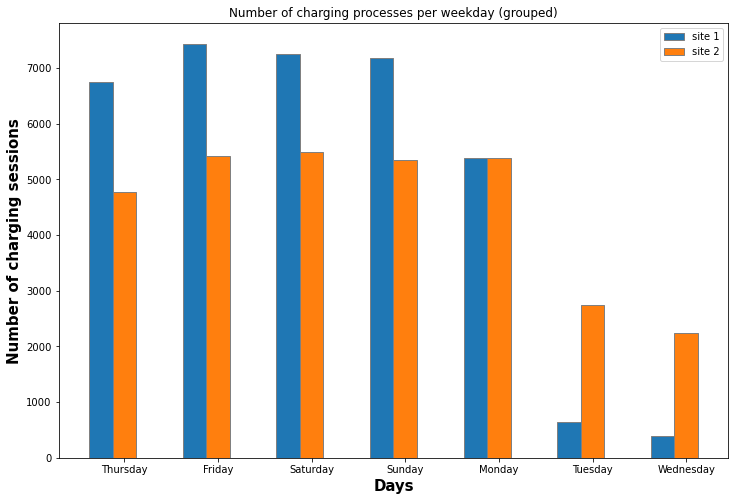

In [220]:
days = sessions_site1_weekly['weekday'].unique()
number_session_per_day_site1 = sessions_site1_weekly.groupby('weekday')['sessionID'].count()
number_session_per_day_site2 = sessions_site2_weekly.groupby('weekday')['sessionID'].count()
title = 'Number of charging processes per weekday (grouped)'
x_label = 'Days'
y_label = 'Number of charging sessions'
createGroupedBarChart(days, number_session_per_day_site1, number_session_per_day_site2, title, x_label, y_label)

During the week, with the exception of Fridays, much more charging takes place at site 1. However, the opposite is true for the weekend. In general, there are fewer charging sessions on weekends, but most of them are on site 2. This could be an indicator that site 1 is the private site that only employees of a company can access. The number of sessions would decrease at weekends because employees do not work or work less on these days and therefore do not charge their EVs.
Let's also have a look on the amount of kWh delivered.

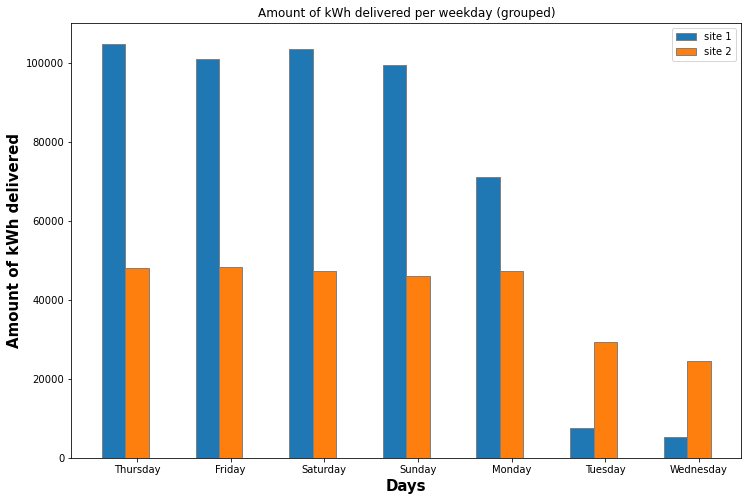

In [221]:
days = sessions_site1_weekly['weekday'].unique()
amount_kWh_per_weekday_site1 = sessions_site1_weekly.groupby('weekday')['kWhDelivered'].sum()
amount_kWh_per_weekday_site2 = sessions_site2_weekly.groupby('weekday')['kWhDelivered'].sum()
title = 'Amount of kWh delivered per weekday (grouped)'
x_label = 'Days'
y_label = 'Amount of kWh delivered'
createGroupedBarChart(days, amount_kWh_per_weekday_site1, amount_kWh_per_weekday_site2, title, x_label, y_label)

<p>This corresponds to the results for the number of charging sessions during the week. </p>
<p>In the following we will look at the charging behaviour during the day. As we have seen before, there is a big difference between weekdays and weekends. For that reason we will differentiate those days.</p>

In [222]:
# add features weekday, connectionHour and disconnectHour
df_charging_sessions['weekday'] = df_charging_sessions['connectionTime'].apply(lambda x: x.strftime('%A'))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_charging_sessions['weekday'] = pd.Categorical(df_charging_sessions['weekday'], categories=weekday_order, ordered=True)
df_charging_sessions["connectionHour"] = df_charging_sessions["connectionTime"].dt.hour
df_charging_sessions["disconnectHour"] = df_charging_sessions["disconnectTime"].dt.hour

# split into weekdays and weekends
charging_sessions_weekdays = df_charging_sessions[(df_charging_sessions['weekday'] == 'Monday') | (df_charging_sessions['weekday'] == 'Tuesday') | (df_charging_sessions['weekday'] == 'Wednesday') | (df_charging_sessions['weekday'] == 'Thursday') | (df_charging_sessions['weekday'] == 'Friday')]
charging_sessions_weekends = df_charging_sessions[(df_charging_sessions['weekday'] == 'Saturday') | (df_charging_sessions['weekday'] == 'Sunday')]

# create dataframe with connectionHour and counts of unique sessionIDs
df_session_count_weekdays = charging_sessions_weekdays.groupby(['siteID', 'connectionHour'])['sessionID'].nunique().reset_index()
df_session_count_weekdays = df_session_count_weekdays.rename(columns={'sessionID': 'sessionCount'})
df_session_count_weekends = charging_sessions_weekends.groupby(['siteID', 'connectionHour'])['sessionID'].nunique().reset_index()
df_session_count_weekends = df_session_count_weekends.rename(columns={'sessionID': 'sessionCount'})

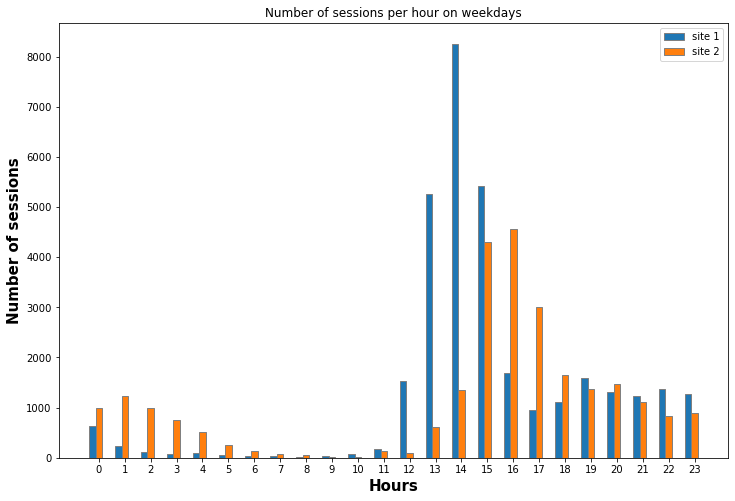

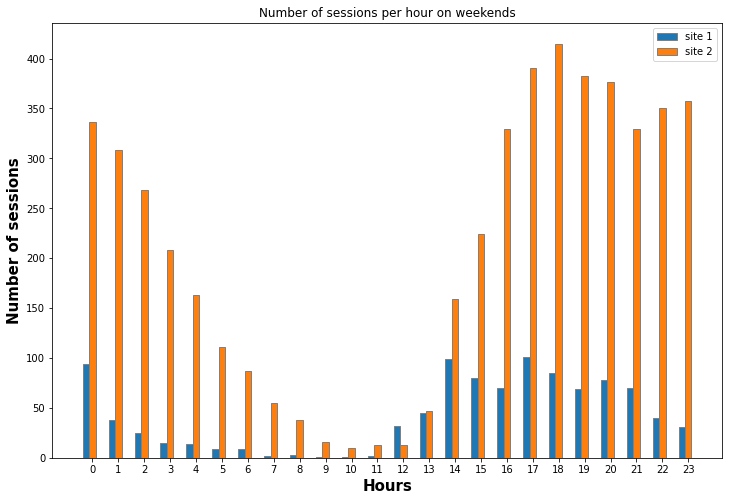

In [223]:
hours = df_session_count_weekdays['connectionHour'].unique()
session_count_site1 = df_session_count_weekdays[df_session_count_weekdays['siteID'] == 1]['sessionCount']
session_count_site2 = df_session_count_weekdays[df_session_count_weekdays['siteID'] == 2]['sessionCount']
title = 'Number of sessions per hour on weekdays'
x_label = 'Hours'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)

hours = df_session_count_weekends['connectionHour'].unique()
session_count_site1 = df_session_count_weekends[df_session_count_weekends['siteID'] == 1]['sessionCount']
session_count_site2 = df_session_count_weekends[df_session_count_weekends['siteID'] == 2]['sessionCount']
title = 'Number of sessions per hour on weekends'
x_label = 'Hours'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)

<p>During the week, the number of sessions is higher in the morning in site 2. However, around midday the number of sessions in site 1 increases rapidly, and around 3 pm in site 2. From 11 a.m. to 3 p.m. there are more sessions in site 1, until 6 p.m. the number is again higher in site 2. Until midnight there is no significant difference between the two sites.</p>
<p>During the weekends the number of sessions is almost the entire time significantly higher in site 2. This again could be a sign that site 2 is the one that is publicly available</p>

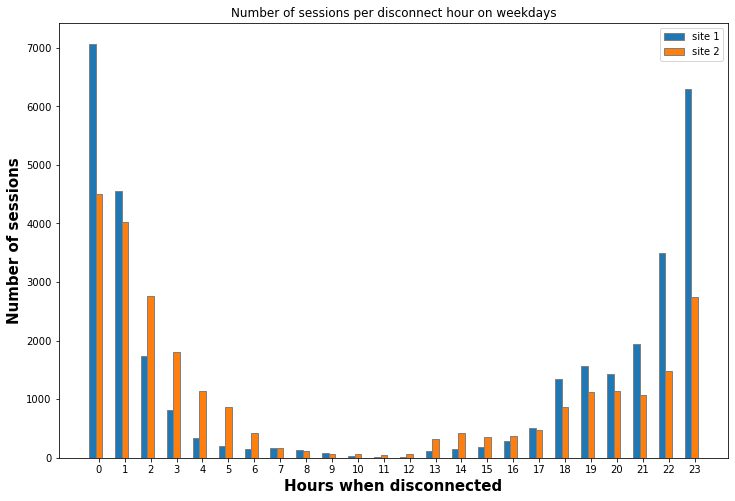

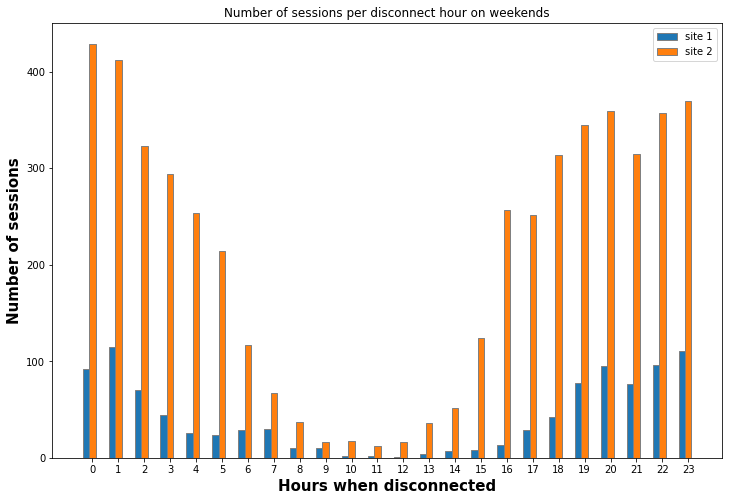

In [224]:
# create dataframe with connectionHour and counts of unique sessionIDs
df_sessionCount_disconnectHour_weekdays = charging_sessions_weekdays.groupby(['siteID', 'disconnectHour'])['sessionID'].nunique().reset_index()
df_sessionCount_disconnectHour_weekdays = df_sessionCount_disconnectHour_weekdays.rename(columns={'sessionID': 'sessionCount'})
df_sessionCount_disconnectHour_weekends = charging_sessions_weekends.groupby(['siteID', 'disconnectHour'])['sessionID'].nunique().reset_index()
df_sessionCount_disconnectHour_weekends = df_sessionCount_disconnectHour_weekends.rename(columns={'sessionID': 'sessionCount'})

hours = df_sessionCount_disconnectHour_weekdays['disconnectHour'].unique()
session_count_site1 = df_sessionCount_disconnectHour_weekdays[df_sessionCount_disconnectHour_weekdays['siteID'] == 1]['sessionCount']
session_count_site2 = df_sessionCount_disconnectHour_weekdays[df_sessionCount_disconnectHour_weekdays['siteID'] == 2]['sessionCount']
title = 'Number of sessions per disconnect hour on weekdays'
x_label = 'Hours when disconnected'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)

hours = df_sessionCount_disconnectHour_weekends['disconnectHour'].unique()
session_count_site1 = df_sessionCount_disconnectHour_weekends[df_sessionCount_disconnectHour_weekends['siteID'] == 1]['sessionCount']
session_count_site2 = df_sessionCount_disconnectHour_weekends[df_sessionCount_disconnectHour_weekends['siteID'] == 2]['sessionCount']
title = 'Number of sessions per disconnect hour on weekends'
x_label = 'Hours when disconnected'
y_label = 'Number of sessions'
createGroupedBarChart(hours, session_count_site1, session_count_site2, title, x_label, y_label)


In [197]:
df_charging_sessions_users = df_charging_sessions[df_charging_sessions['userInformation']==True]
userInformation = pd.Series(df_charging_sessions_users['userInputs'])
userInformation = userInformation.str.replace("'", '"')
print(userInformation[1])
df = pd.json_normalize(userInformation.apply(json.loads))
print(df.head())

[{"WhPerMile": 280, "kWhRequested": 70.0, "milesRequested": 250, "minutesAvailable": 595, "modifiedAt": "Thu, 02 Jan 2020 13:37:11 GMT", "paymentRequired": True, "requestedDeparture": "Thu, 02 Jan 2020 23:31:50 GMT", "userID": 4275}]


JSONDecodeError: Expecting value: line 1 column 157 (char 156)

Let's have a look at the Charging Duration during the Week!

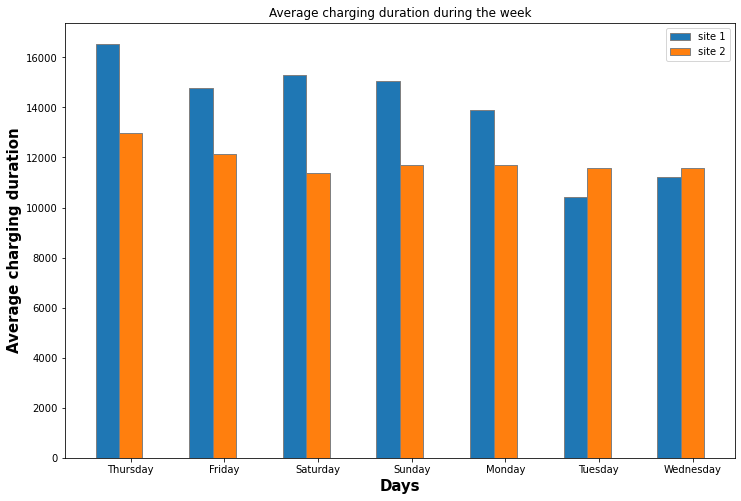

In [225]:
sessions_site1_weekly['totalChargingTime'] = pd.to_timedelta(sessions_site1_weekly['totalChargingTime'])
sessions_site1_weekly['chargingDuration'] = sessions_site1_weekly['totalChargingTime'].dt.total_seconds()
sessions_site2_weekly['totalChargingTime'] = pd.to_timedelta(sessions_site2_weekly['totalChargingTime'])
sessions_site2_weekly['chargingDuration'] = sessions_site2_weekly['totalChargingTime'].dt.total_seconds()
days = sessions_site1_weekly['weekday'].unique()
avg_charging_duration_site1 = sessions_site1_weekly.groupby('weekday')['chargingDuration'].mean()
avg_charging_duration_site2 = sessions_site2_weekly.groupby('weekday')['chargingDuration'].mean()
title = 'Average charging duration during the week'
x_label = 'Days'
y_label = 'Average charging duration'
createGroupedBarChart(days, avg_charging_duration_site1, avg_charging_duration_site2, title, x_label, y_label)